In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from sklearn import datasets
import matplotlib.pyplot as plt

print(sns.get_dataset_names())


['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [4]:
data=sns.load_dataset('planets')
data.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [10]:
data.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [11]:
data.shape

(1035, 6)

In [12]:
data.tail()

,method,number,orbital_period,mass,distance,year
1030,Transit,1,3.941507,NaN,172.0,2006
1031,Transit,1,2.615864,NaN,148.0,2007
1032,Transit,1,3.191524,NaN,174.0,2007
1033,Transit,1,4.125083,NaN,293.0,2008
1034,Transit,1,4.187757,NaN,260.0,2008


In [15]:
data.info()
df=data.copy()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [16]:
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [17]:
df.dtypes

method             object
number              int64
orbital_period    float64
mass              float64
distance          float64
year                int64
dtype: object

In [18]:
df.duplicated().sum

<bound method Series.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
1030    False
1031    False
1032    False
1033    False
1034    False
Length: 1035, dtype: bool>

In [19]:
df['orbital_period'].mean()


np.float64(2002.9175960947582)

In [20]:
mean1 = df['orbital_period'].mean()
mean2 = df['mass'].mean()
mean3 = df['distance'].mean()
df['orbital_period']=df['orbital_period'].fillna(mean1)
df['mass']=df['mass'].fillna(mean2)
df['distance']=df['distance'].fillna(mean3)


In [24]:
df.tail()

,method,number,orbital_period,mass,distance,year
1030,Transit,1,3.941507,2.638161,172.0,2006
1031,Transit,1,2.615864,2.638161,148.0,2007
1032,Transit,1,3.191524,2.638161,174.0,2007
1033,Transit,1,4.125083,2.638161,293.0,2008
1034,Transit,1,4.187757,2.638161,260.0,2008


In [25]:
df.isnull().sum()

method            0
number            0
orbital_period    0
mass              0
distance          0
year              0
dtype: int64

In [26]:
numerical = df.select_dtypes(include=['float64', 'int64']).columns
print("Numerical columns:", numerical)


Numerical columns: Index(['number', 'orbital_period', 'mass', 'distance', 'year'], dtype='object')


In [27]:
def remove_outliers(df, columns):
    for i in columns:
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        titanic = df[(df[i] < lower) | (df[i] > upper)]
        return df

df_clean=remove_outliers(df, numerical)

## Univariate Analysis

In [28]:
for col in numerical:
    print(f"Univariate Summary Statistics for {col} Column:")
    print(f"Mean={titanic[col].mean()}")
    print(f"Mode={titanic[col].mode()}")
    print(f"Median={titanic[col].median()}")
    print(f"Variance={np.var(titanic[col])}")
    print(f"Skewness={titanic[col].skew()}")
    

Univariate Summary Statistics for number Column:
Mean=1.7855072463768116
Mode=0    1
Name: number, dtype: int64
Median=1.0
Variance=1.538533921445073
Skewness=2.030571846788593
Univariate Summary Statistics for orbital_period Column:
Mean=2002.9175960947582
Mode=0     123.0
1     428.5
2     883.0
3    1845.0
Name: orbital_period, dtype: float64
Median=39.9795
Variance=676083864.8544192
Skewness=24.273066584470723
Univariate Summary Statistics for mass Column:
Mean=2.6381605847953216
Mode=0    1.8
1    1.9
Name: mass, dtype: float64
Median=1.26
Variance=14.553408501022659
Skewness=2.5508243210766492
Univariate Summary Statistics for distance Column:
Mean=264.06928217821786
Mode=0    780.0
Name: distance, dtype: float64
Median=55.25
Variance=536794.6192111186
Skewness=7.362539120859176
Univariate Summary Statistics for year Column:
Mean=2009.0705314009663
Mode=0    2011
Name: year, dtype: int64
Median=2010.0
Variance=15.766039814231418
Skewness=-1.326369807957969


In [29]:
categorical = df.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical)

Categorical columns: Index(['method'], dtype='object')


In [30]:
for col in categorical:
    print(f"Frequency distribution for {col}:")
    print(df[col].value_counts())
    print("\n")


Frequency distribution for method:
method
Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: count, dtype: int64




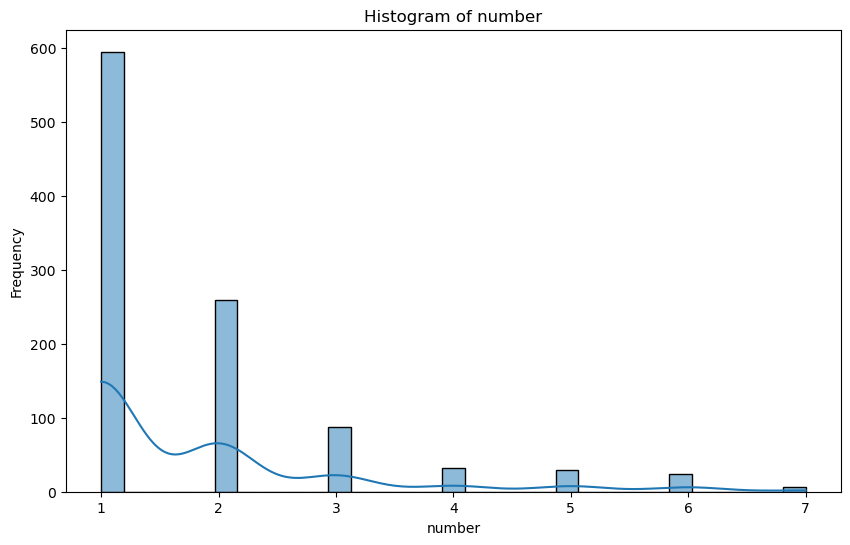

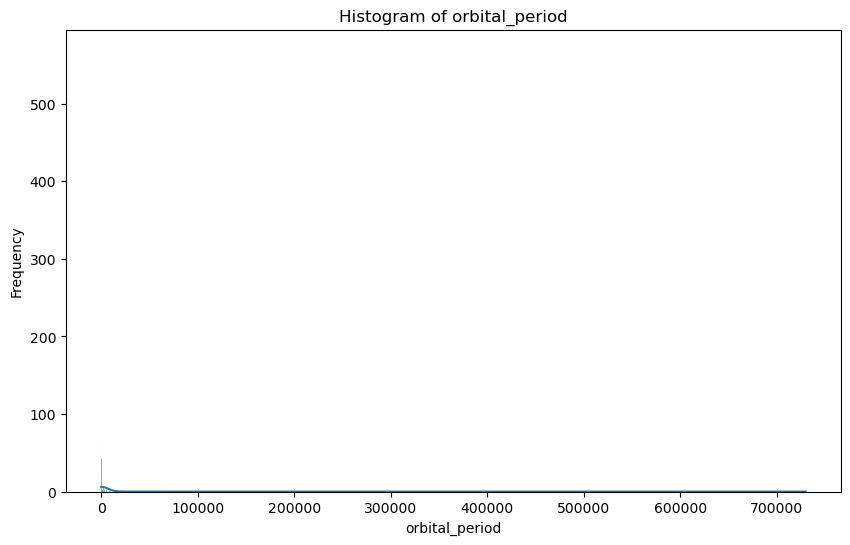

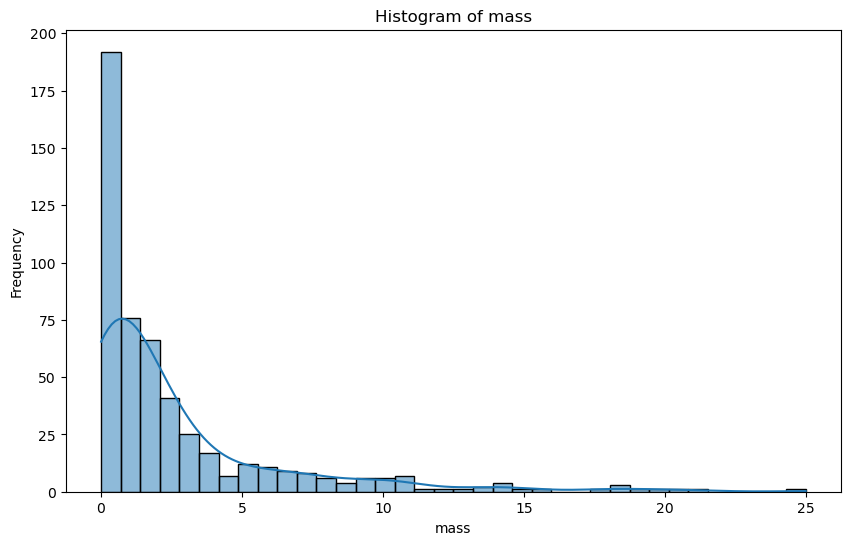

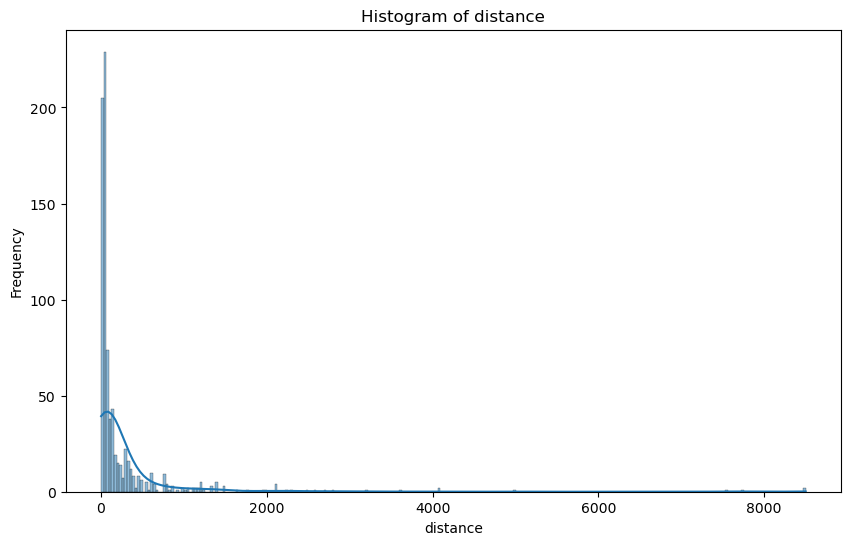

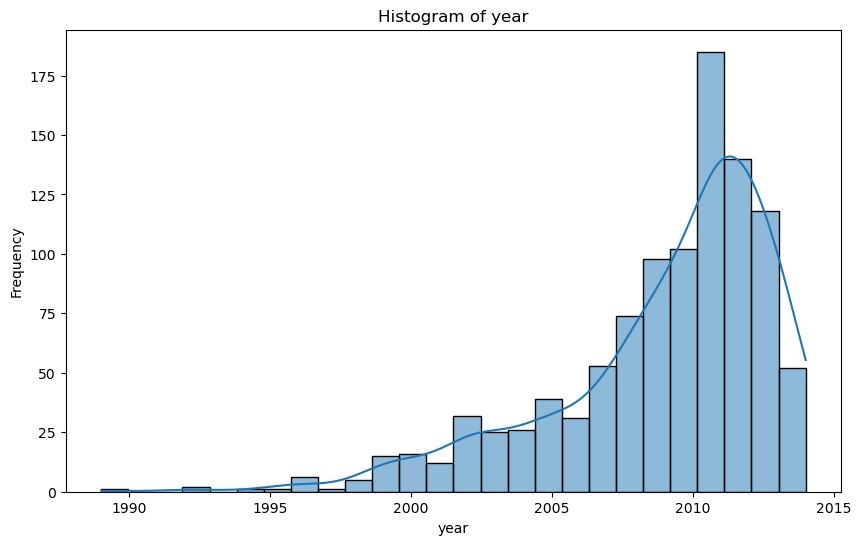

In [31]:
import matplotlib.pyplot as plt
# Histogram
for col in numerical:
        plt.figure(figsize=(10, 6))
        sns.histplot(titanic[col], kde=True)
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        

## Bivariate Analysis

In [32]:
print(df[numerical].corr())

                  number  orbital_period      mass  distance      year
number          1.000000       -0.012462 -0.159386 -0.030860  0.147849
orbital_period -0.012462        1.000000  0.007275 -0.010437 -0.031903
mass           -0.159386        0.007275  1.000000  0.020385 -0.091096
distance       -0.030860       -0.010437  0.020385  1.000000  0.156888
year            0.147849       -0.031903 -0.091096  0.156888  1.000000


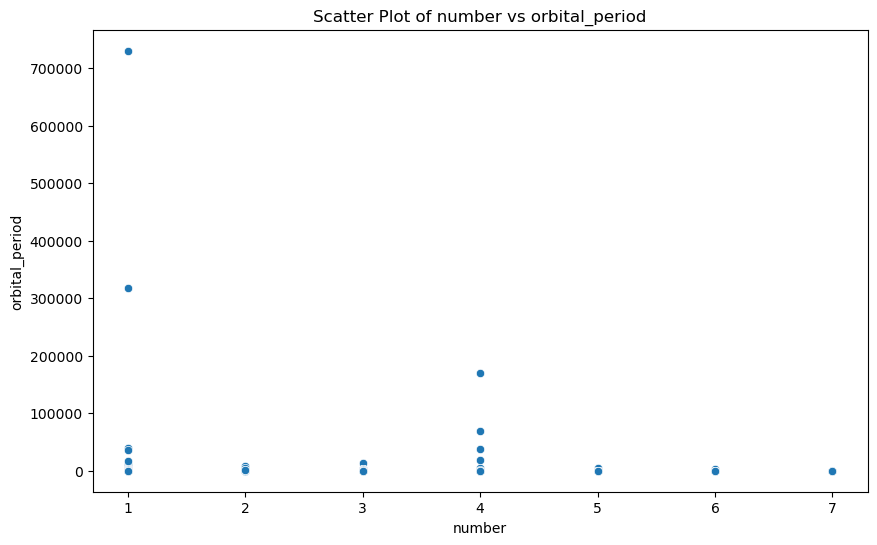

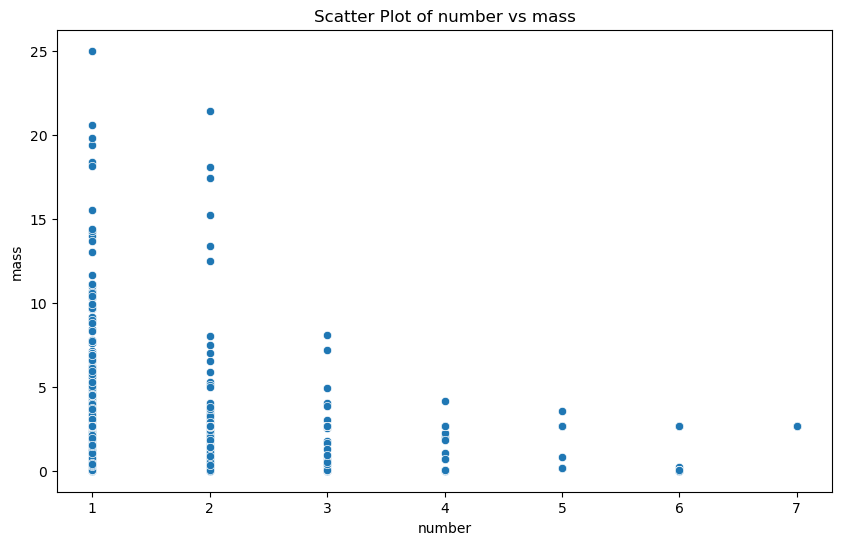

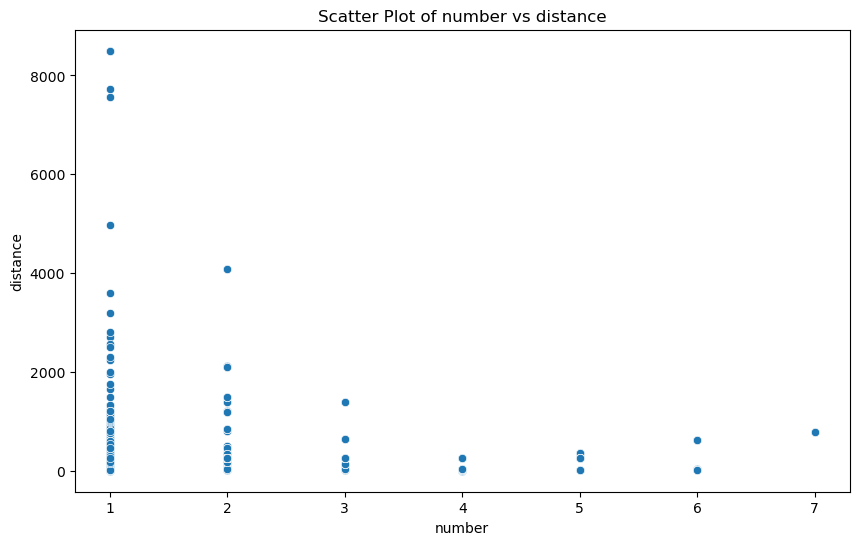

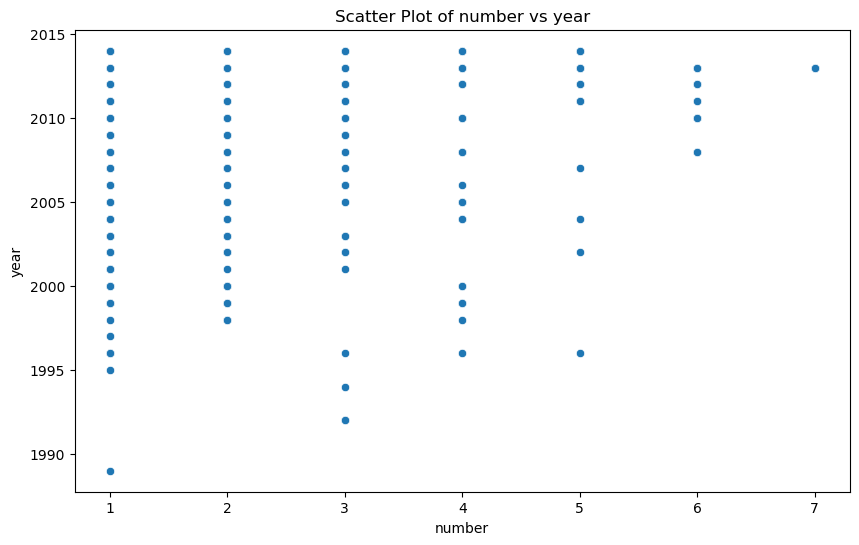

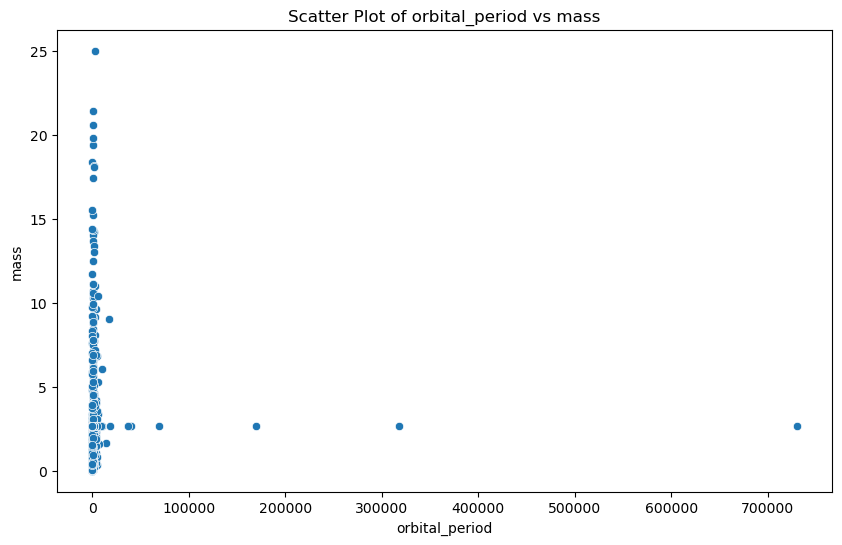

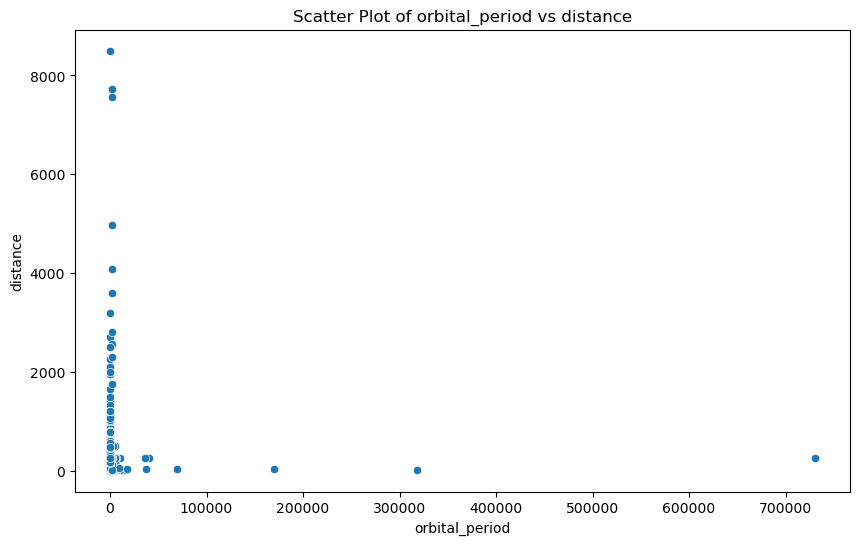

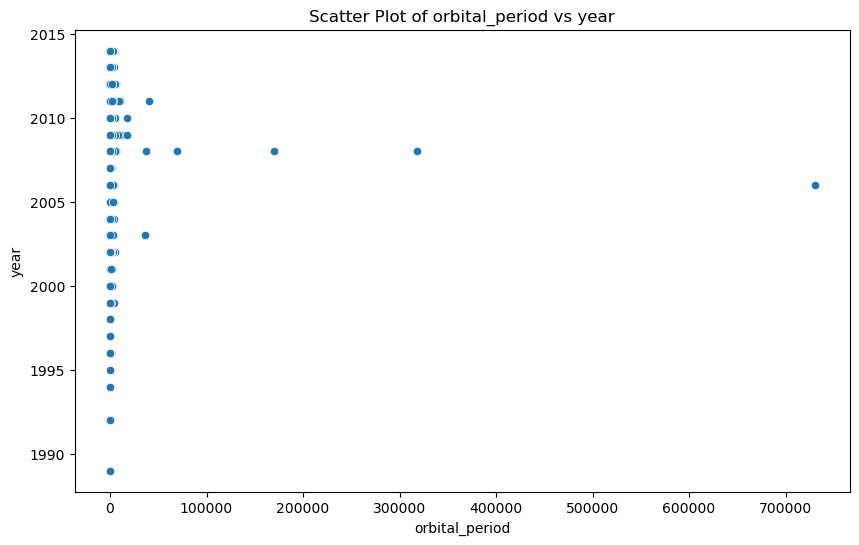

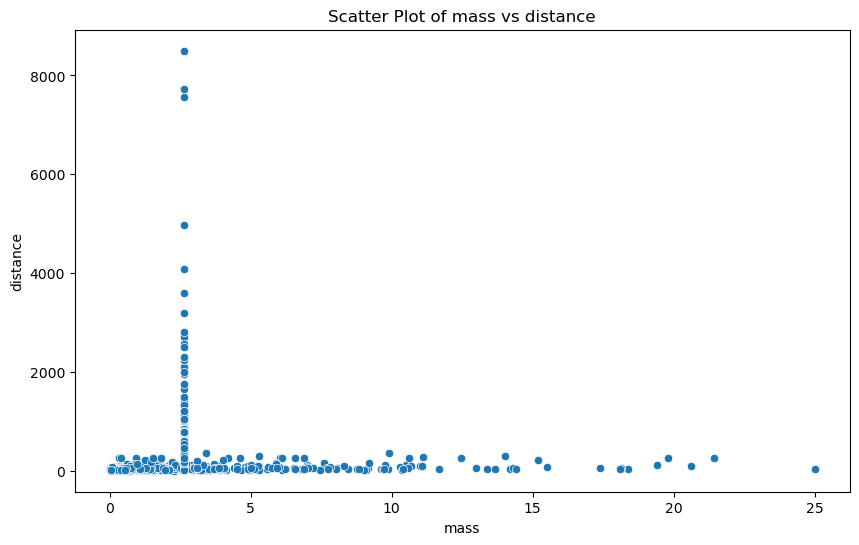

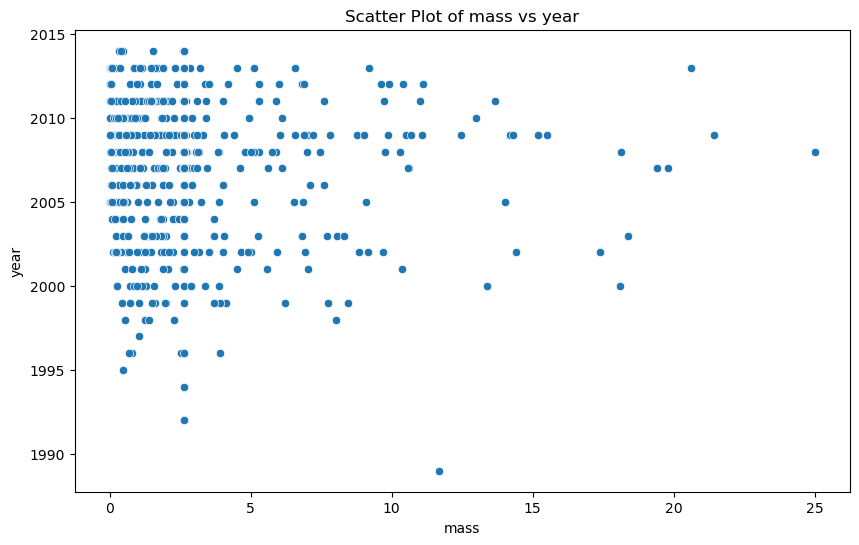

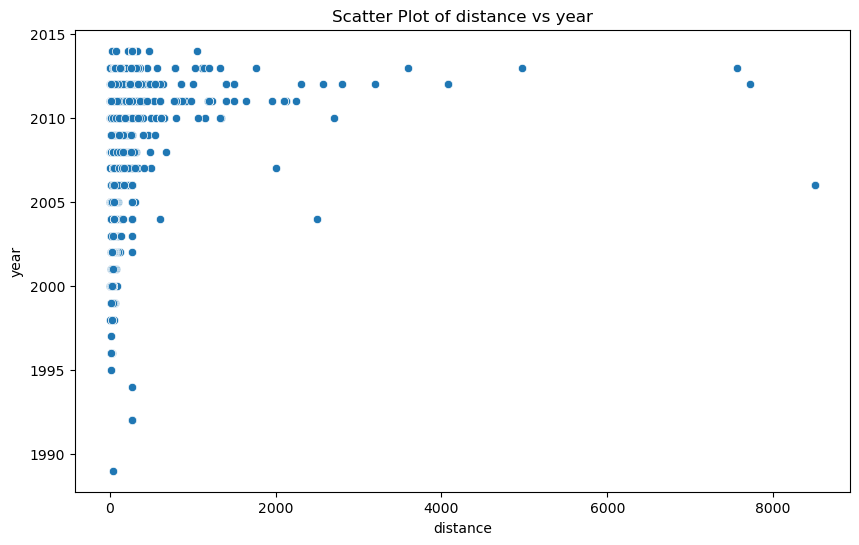

In [33]:
for i, col1 in enumerate(numerical):
        for j, col2 in enumerate(numerical):
            if i < j: 
                plt.figure(figsize=(10, 6))
                sns.scatterplot(x=df[col1], y=df[col2])
                plt.title(f'Scatter Plot of {col1} vs {col2}')
                plt.xlabel(col1)
                plt.ylabel(col2)
                plt.show()

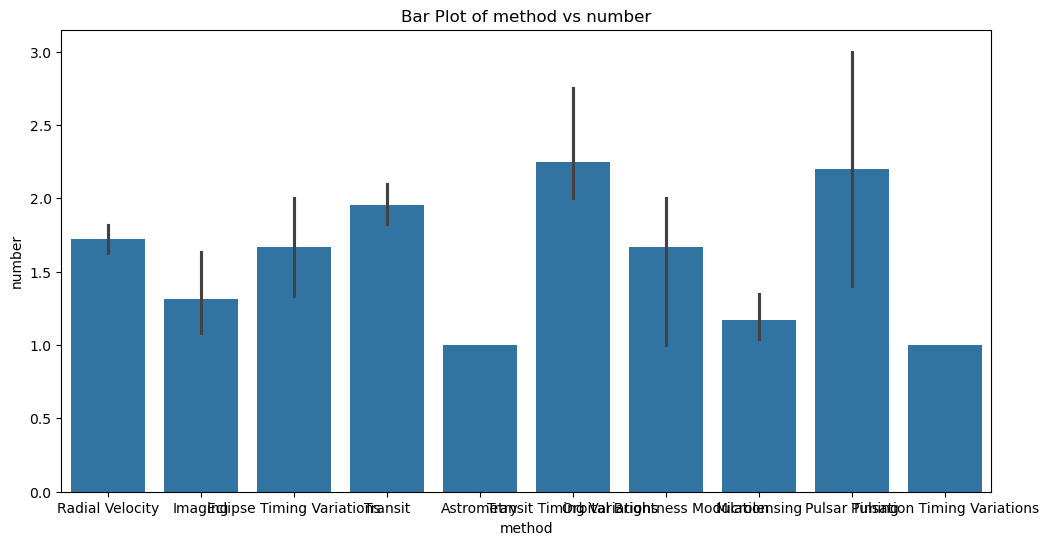

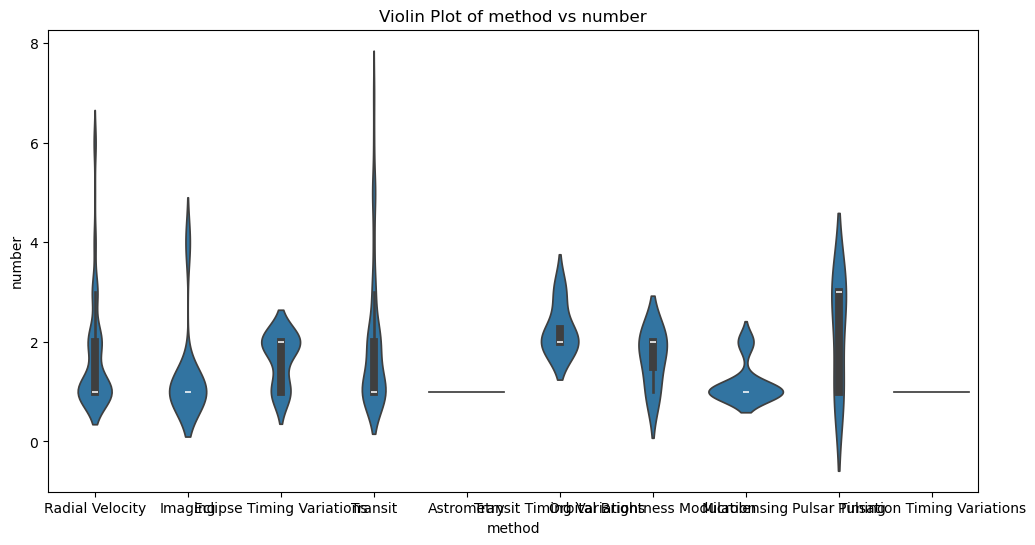

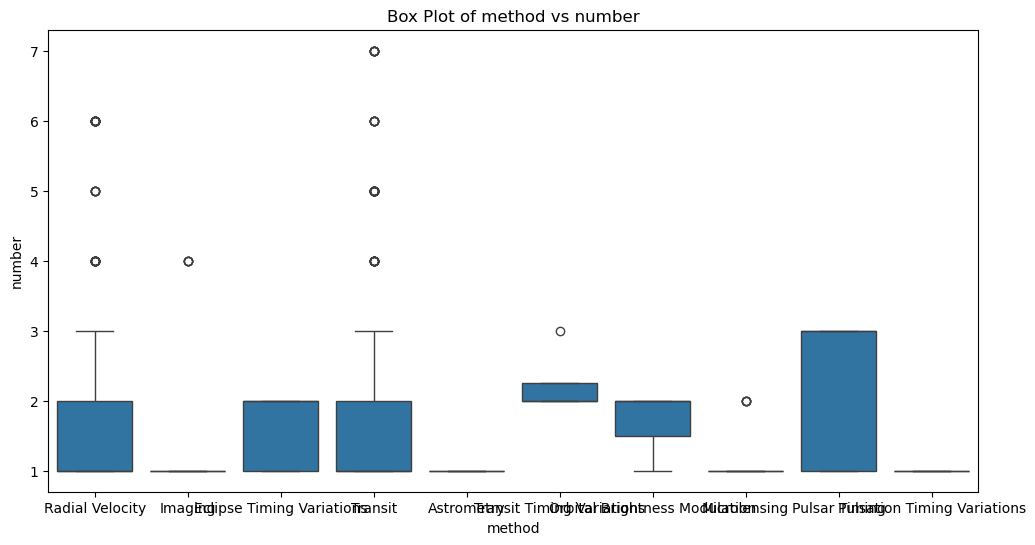

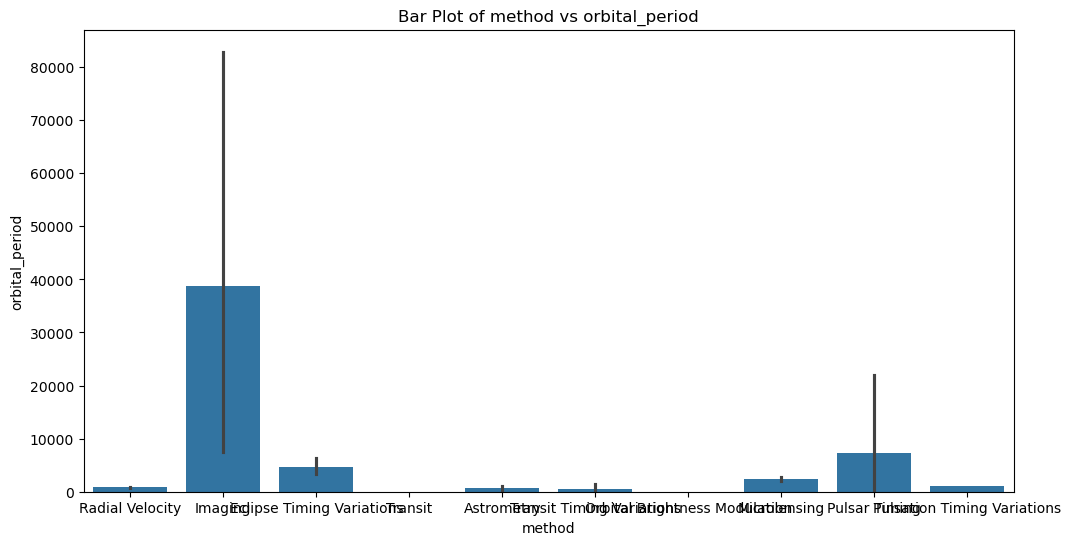

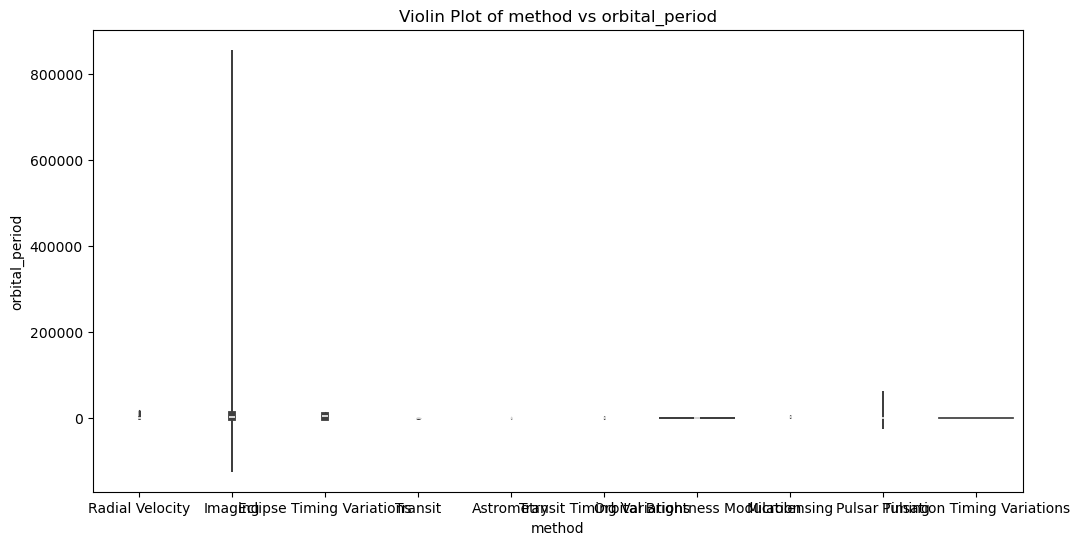

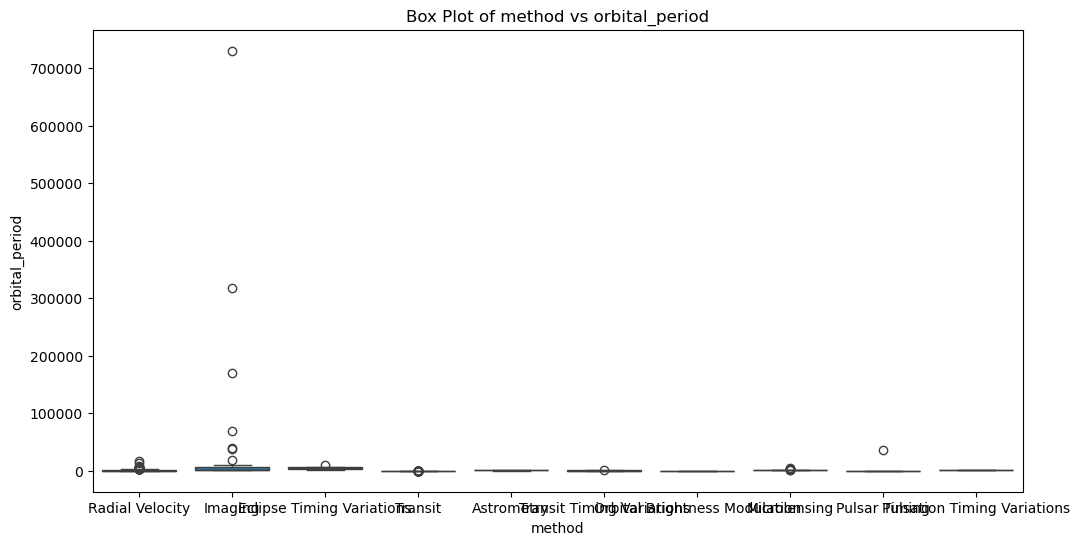

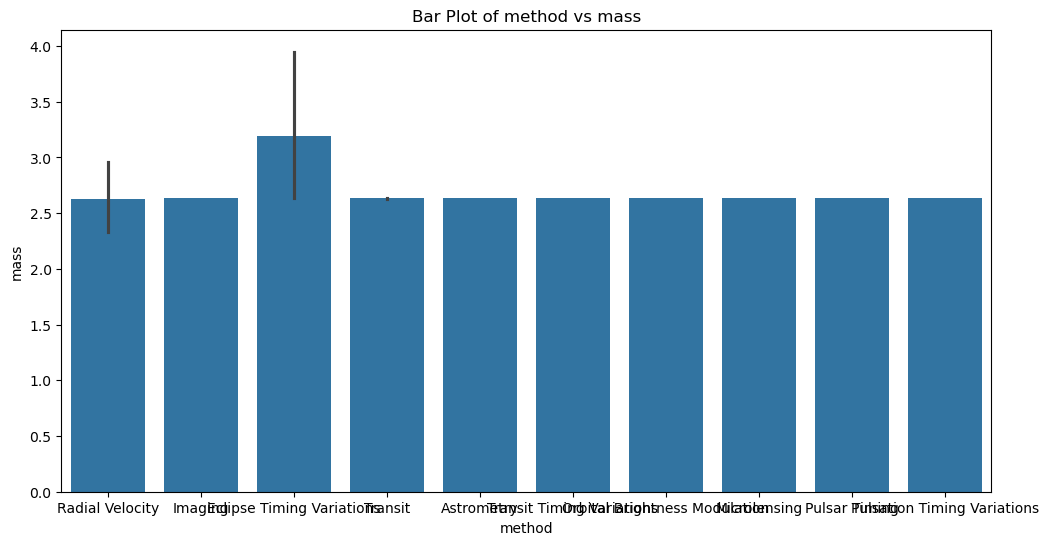

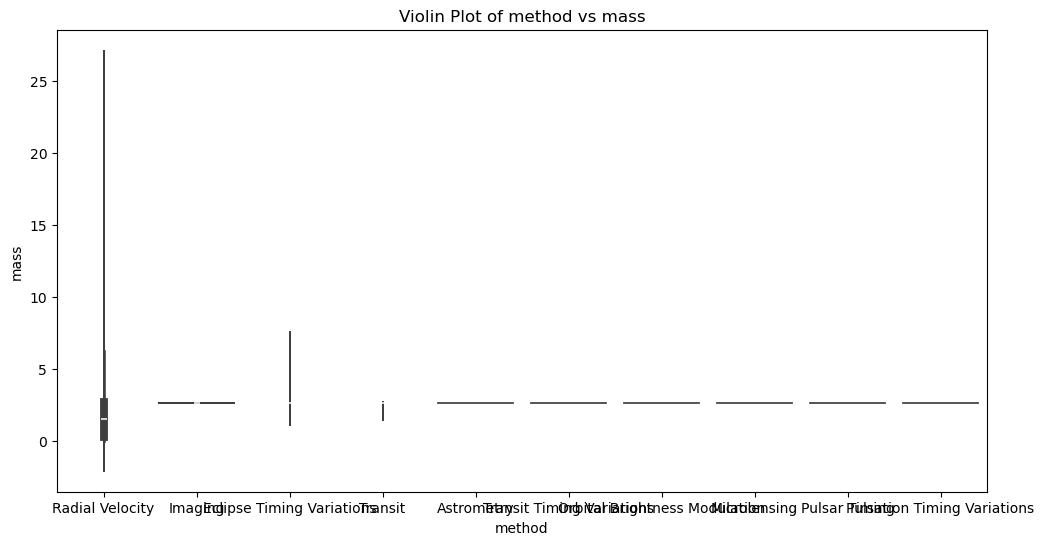

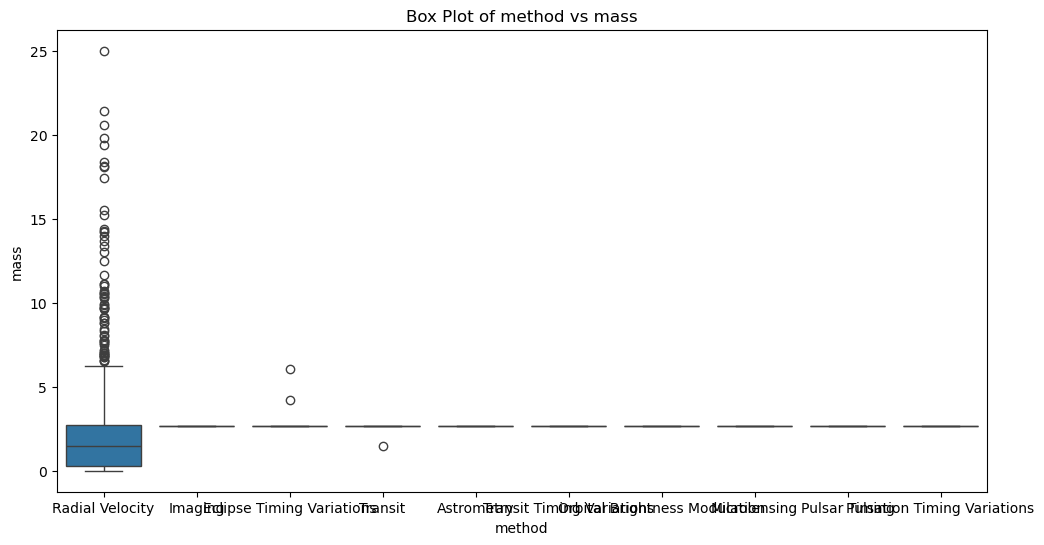

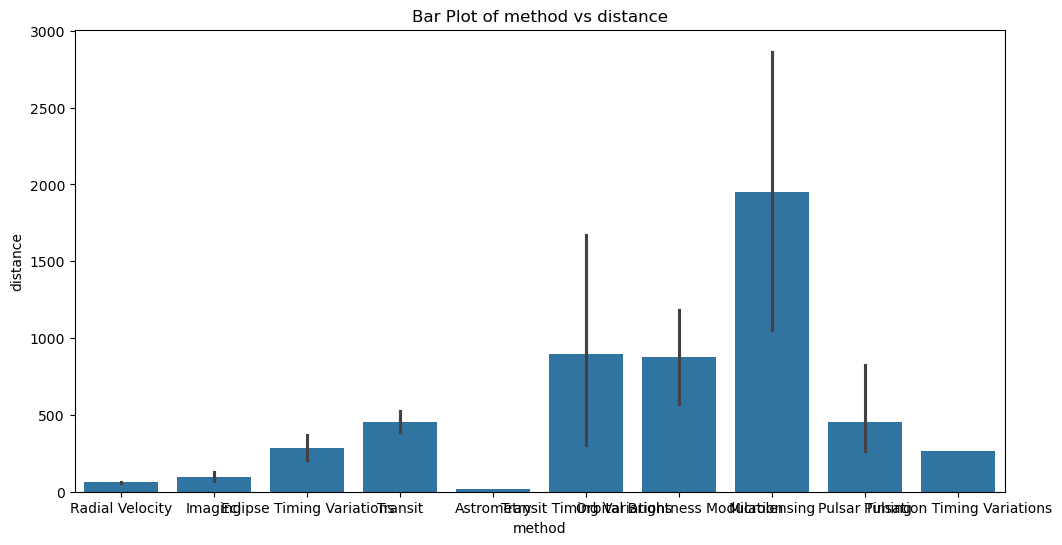

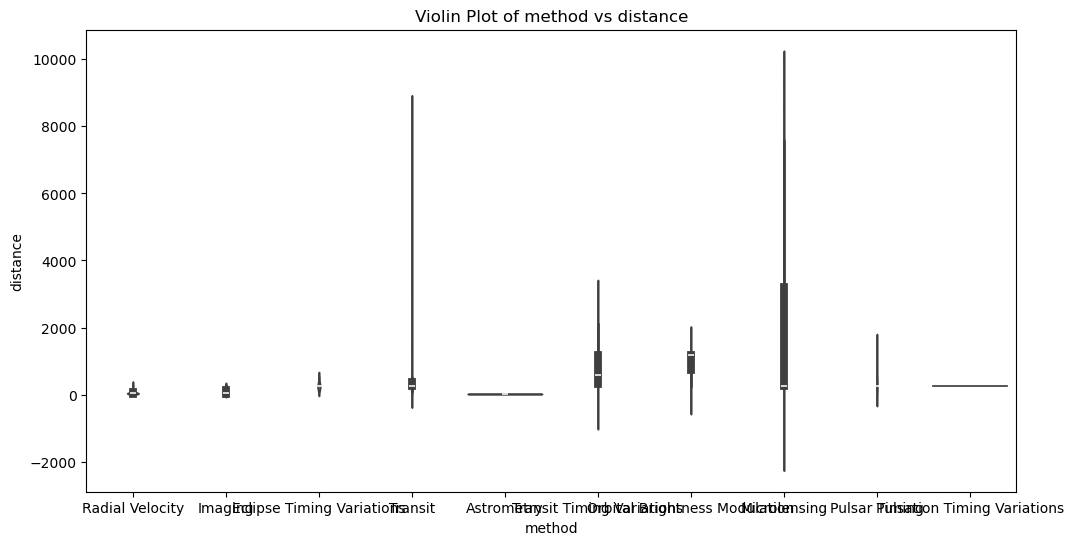

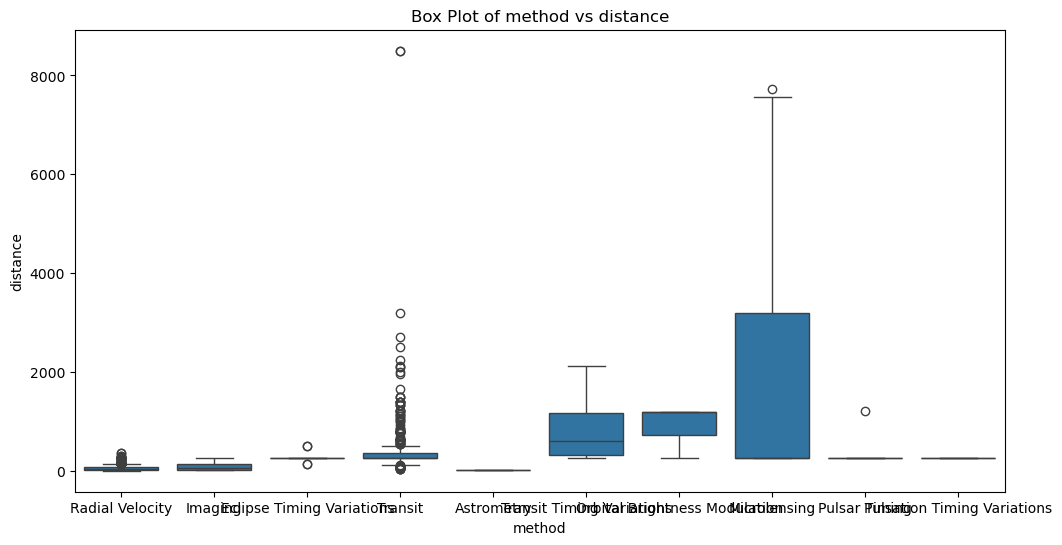

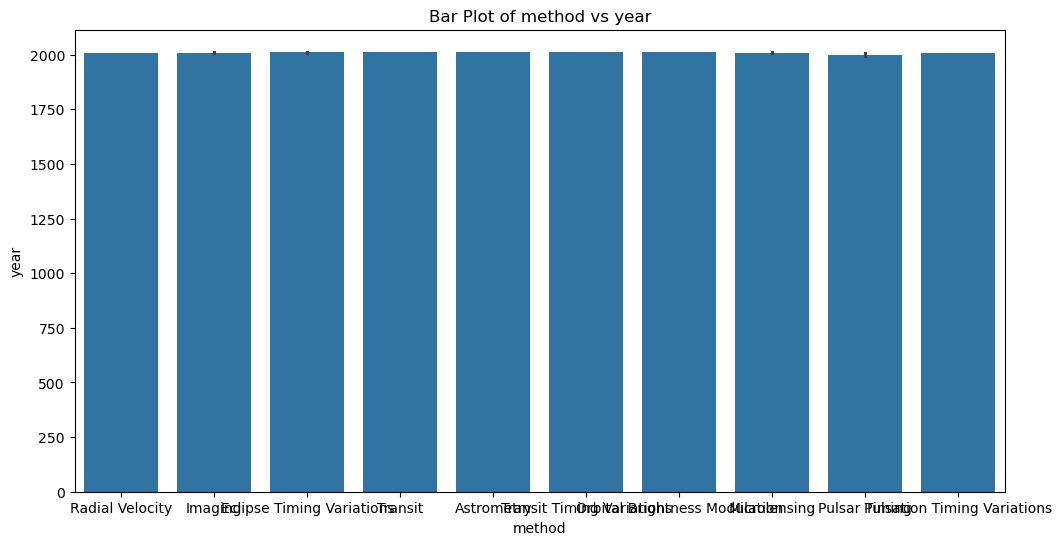

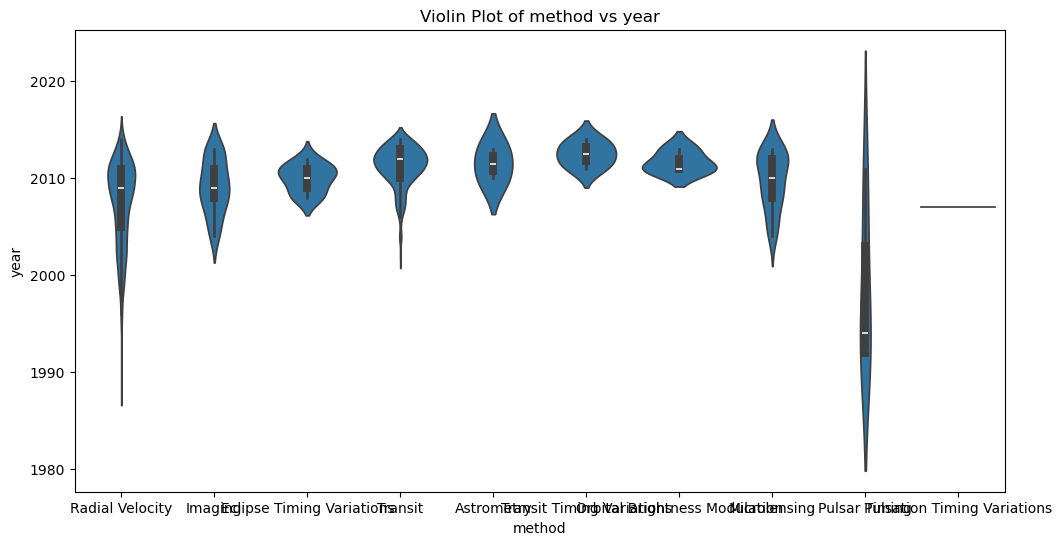

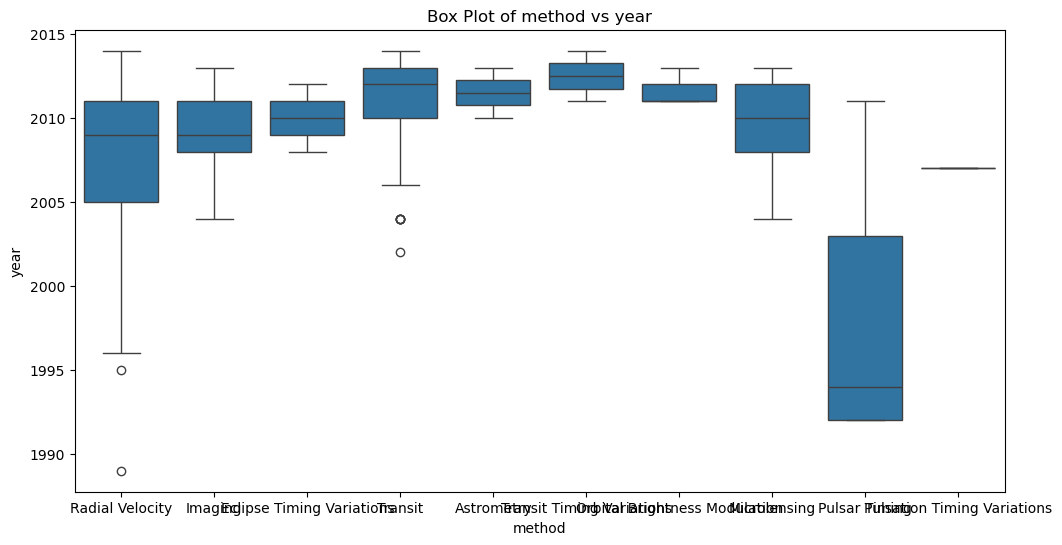

In [34]:
def plot_categorical_numerical(df):
    categorical = df.select_dtypes(include=['object']).columns
    numerical = df.select_dtypes(include=['float64', 'int64']).columns
    
    for cat in categorical:
        for num in numerical:
            plt.figure(figsize=(12, 6))
            sns.barplot(x=cat, y=num, data=df)
            plt.title(f'Bar Plot of {cat} vs {num}')
            plt.xlabel(cat)
            plt.ylabel(num)
            plt.show()
            
            plt.figure(figsize=(12, 6))
            sns.violinplot(x=cat, y=num, data=df)
            plt.title(f'Violin Plot of {cat} vs {num}')
            plt.xlabel(cat)
            plt.ylabel(num)
            plt.show()
            
            plt.figure(figsize=(12, 6))
            sns.boxplot(x=cat, y=num, data=df)
            plt.title(f'Box Plot of {cat} vs {num}')
            plt.xlabel(cat)
            plt.ylabel(num)
            plt.show()

plot_categorical_numerical(df)


## Multivariate Analysis

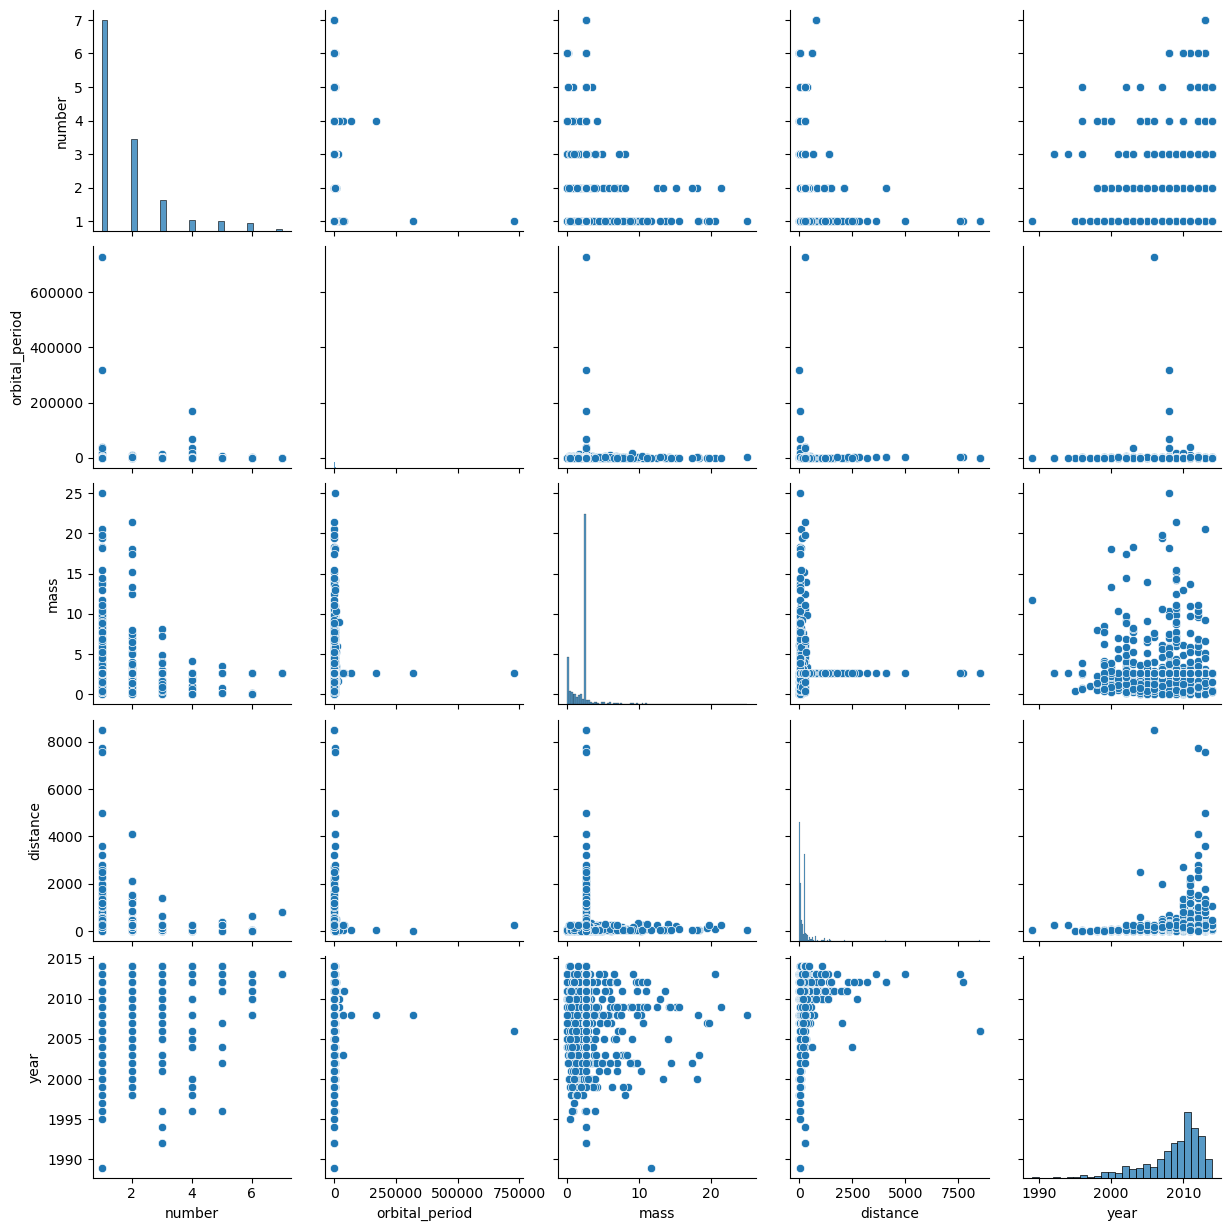

In [35]:
sns.pairplot(df[numerical])
plt.show()

In [36]:
correlation_matrix = df[numerical].corr()
print(correlation_matrix)

                  number  orbital_period      mass  distance      year
number          1.000000       -0.012462 -0.159386 -0.030860  0.147849
orbital_period -0.012462        1.000000  0.007275 -0.010437 -0.031903
mass           -0.159386        0.007275  1.000000  0.020385 -0.091096
distance       -0.030860       -0.010437  0.020385  1.000000  0.156888
year            0.147849       -0.031903 -0.091096  0.156888  1.000000


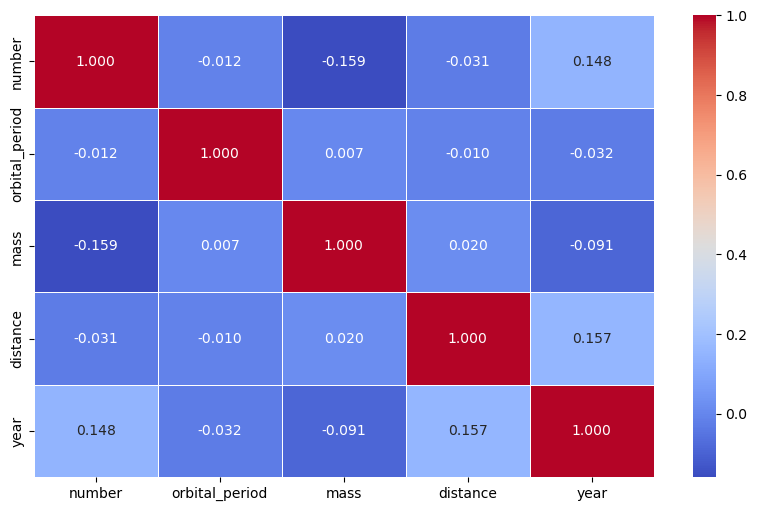

In [37]:
correlation_matrix = df[numerical].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.3f', linewidths=0.5)
plt.show()